# ALEXNET Model With 25 Epoch and Adam Optimiser

# Loading Libraries

In [1]:
import tensorflow as tf
import os
import random
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.patches as mpatches
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from tensorflow.keras.models import load_model
from tensorflow.keras.applications import (
    VGG19,VGG16
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Creating Function which comprises of Pre-Trained Model 

In [2]:
# Define a function to load the pre-trained model
def load_pretrained_model(model_name):
    if model_name == 'ALEXNET':
        model = tf.keras.Sequential()
        # Layer 1
        model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
        # Layer 2
        model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

        # Layer 3
        model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
        model.add(tf.keras.layers.BatchNormalization())

        # Layer 4
        model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
        model.add(tf.keras.layers.BatchNormalization())

        # Layer 5
        model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
        # Layer 6
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=4096, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))

        # Layer 7
        model.add(tf.keras.layers.Dense(units=4096, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))

        # Layer 8
        model.add(tf.keras.layers.Dense(units=26, activation = 'softmax'))
        
    elif model_name == 'VGG19':
        model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        x = tf.keras.layers.Flatten()(model.output)
        x = tf.keras.layers.Dense(64, activation='relu')(x)
        output = tf.keras.layers.Dense(26)(x)
        model = tf.keras.models.Model(model.input, output)
        
    elif model_name == 'ALEXNET_TL':
        model = tf.keras.Sequential()
        # Layer 1
        model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
        # Layer 2
        model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

        # Layer 3
        model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
        model.add(tf.keras.layers.BatchNormalization())

        # Layer 4
        model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
        model.add(tf.keras.layers.BatchNormalization())

        # Layer 5
        model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
        # Layer 6
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=4096, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))

        # Layer 7
        model.add(tf.keras.layers.Dense(units=4096, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))

        # Layer 8
        model.add(tf.keras.layers.Dense(units=26, activation = 'softmax'))
        
        base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        for layer in base_model.layers:
            layer.trainable = False
        model = tf.keras.models.Sequential()
        model.add(base_model)
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(256, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(26, activation='softmax'))
        
    elif model_name == 'VGG19_TL':
        base_model = tf.keras.applications.VGG19(include_top=False, input_shape=(224, 224, 3))
        for layer in base_model.layers:
            layer.trainable = False
        x = tf.keras.layers.Flatten()(base_model.output)
        x = tf.keras.layers.Dense(1024, activation='relu')(x)
        x = tf.keras.layers.Dense(26, activation='softmax')(x)
        model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

    else:
        raise ValueError(f"Invalid model name: {model_name}")
    return model

## Loading Emotic Dataset

In [3]:
# Load the EMOTIC dataset
data_dir = '/kaggle/input/emoticon/Dataset'
train_dir = '/kaggle/working/train/'
val_dir = '/kaggle/working/val/'
test_dir = '/kaggle/working/test/'
batch_size = 56
image_size = (224, 224)

## Dataset Preprocessing and Augmentation

In [4]:
# Count the number of images in each class
num_images_per_class = {}
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    num_images_per_class[class_name] = len(os.listdir(class_path))

# Determine the class weights for training
total_images = sum(num_images_per_class.values())
class_weights = {class_name: total_images / num_images_per_class[class_name] for class_name in num_images_per_class}

print("Total Images: ",total_images)
print("Class Weights: ",class_weights)

# Define the data augmentation and preprocessing pipelines
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])
preprocessing = tf.keras.applications.mobilenet_v2.preprocess_input

Total Images:  39537
Class Weights:  {'Surprise': 99.09022556390977, 'Confidence': 10.388071466106148, 'Annoyance': 114.93313953488372, 'Fear': 236.74850299401197, 'Pleasure': 21.0864, 'Excitement': 9.899098647971957, 'Anticipation': 8.175558312655086, 'Affection': 42.4672395273899, 'Sadness': 122.40557275541795, 'Fatigue': 76.77087378640776, 'Pain': 222.11797752808988, 'Sensitivity': 114.6, 'Disapproval': 129.6295081967213, 'Engagement': 3.9242679900744415, 'Esteem': 49.05334987593052, 'Aversion': 244.05555555555554, 'Disconnection': 29.637931034482758, 'Disquietment': 86.51422319474835, 'Embarrassment': 263.58, 'Sympathy': 59.54367469879518, 'Doubt': 61.970219435736674, 'Happiness': 8.634417995195458, 'Suffering': 166.1218487394958, 'Yearning': 62.262992125984255, 'Peace': 24.91304347826087, 'Anger': 203.79896907216494}


In [5]:
class_weightss = {0: 99.09022556390977, 1: 10.388071466106148, 2: 114.93313953488372, 3: 236.74850299401197, 4: 21.0864, 5: 9.899098647971957, 6: 8.175558312655086, 7: 42.4672395273899, 8: 122.40557275541795, 9: 76.77087378640776, 
                 10: 222.11797752808988, 11: 114.6, 12: 129.6295081967213, 13: 3.9242679900744415, 14: 49.05334987593052, 15: 244.05555555555554, 16: 29.637931034482758, 17: 86.51422319474835, 18: 263.58, 19: 59.54367469879518,
                 20: 61.970219435736674, 21: 8.634417995195458, 22: 166.1218487394958, 23: 62.262992125984255, 24: 24.91304347826087, 25: 203.79896907216494}

In [6]:
# Create the train, validation, and test directories if they do not exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [7]:
# Move 70% of the images from each emotion folder to the train directory,
# 15% of the images to the validation directory, and 15% to the test directory
for emotion_dir in os.listdir(data_dir):
    emotion_path = os.path.join(data_dir, emotion_dir)
    images = os.listdir(emotion_path)
    random.shuffle(images)
    num_images = len(images)
    train_split = int(0.7 * num_images)
    val_split = int(0.15 * num_images)
    train_images = images[:train_split]
    val_images = images[train_split:train_split+val_split]
    test_images = images[train_split+val_split:]
    for image in train_images:
        src = os.path.join(emotion_path, image)
        dst = os.path.join(train_dir, emotion_dir, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copyfile(src, dst)
    for image in val_images:
        src = os.path.join(emotion_path, image)
        dst = os.path.join(val_dir, emotion_dir, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copyfile(src, dst)
    for image in test_images:
        src = os.path.join(emotion_path, image)
        dst = os.path.join(test_dir, emotion_dir, image)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.copyfile(src, dst)

In [8]:
# Define the train and validation data generators
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocessing,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    fill_mode='nearest'
).flow_from_directory(train_dir,target_size=image_size,batch_size=batch_size,class_mode='categorical')

validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocessing
).flow_from_directory(val_dir,target_size=image_size,batch_size=batch_size,class_mode='categorical')

Found 27662 images belonging to 26 classes.
Found 5918 images belonging to 26 classes.


In [9]:
label_counts = {}
for label in train_generator.labels:
    if label not in label_counts:
        label_counts[label] = 1
    else:
        label_counts[label] += 1

for label, count in label_counts.items():
    if count > 1:
        print(f"Label {label} has {count} occurrences in the training set.")


Label 0 has 651 occurrences in the training set.
Label 1 has 135 occurrences in the training set.
Label 2 has 240 occurrences in the training set.
Label 3 has 3385 occurrences in the training set.
Label 4 has 113 occurrences in the training set.
Label 5 has 2664 occurrences in the training set.
Label 6 has 213 occurrences in the training set.
Label 7 has 933 occurrences in the training set.
Label 8 has 319 occurrences in the training set.
Label 9 has 446 occurrences in the training set.
Label 10 has 105 occurrences in the training set.
Label 11 has 7052 occurrences in the training set.
Label 12 has 564 occurrences in the training set.
Label 13 has 2795 occurrences in the training set.
Label 14 has 360 occurrences in the training set.
Label 15 has 116 occurrences in the training set.
Label 16 has 3205 occurrences in the training set.
Label 17 has 124 occurrences in the training set.
Label 18 has 1110 occurrences in the training set.
Label 19 has 1312 occurrences in the training set.
Lab

In [10]:
# Define the list of emotions
class_names = ['Affection', 'Anger', 'Annoyance', 'Anticipation', 'Aversion', 'Confidence', 'Disapproval', 'Disconnection',
            'Disquietment', 'Doubt/Confusion', 'Embarrassment', 'Engagement', 'Esteem', 'Excitement', 'Fatigue',
            'Fear', 'Happiness','Pain', 'Peace', 'Pleasure', 'Sadness', 'Sensitivity', 'Suffering', 'Surprise',
            'Sympathy', 'Yearning']

## Created Function which can run All Pre-Trained Model

In [11]:
def train_all_models():
    models = ['ALEXNET', 'VGG19', 'ALEXNET_TL', 'VGG19_TL']
    optimizers = [tf.keras.optimizers.Adam()]
    results = {}
    
    # loop through all models
    for model_name in models:
        print(f'Training {model_name} model...')
        model = load_pretrained_model(model_name)
        model_results = {}
        
        # loop through all optimizers
        for optimizer in optimizers:
            # compile model with optimizer and categorical crossentropy loss
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
            
            print(f"{model_name} model with {optimizer.__class__.__name__} optimizer")

            # create data generators for training and validation sets
            train_data_gen, val_data_gen = train_generator,validation_generator
            history = model.fit(train_data_gen, epochs=25, validation_data=val_data_gen, verbose=0)
            model.save('my_model')

            # evaluate model on validation set
            loss, acc = model.evaluate(val_data_gen)

            # store results in dictionary
            model_results[str(optimizer)] = {'Accuracy': acc, 'Loss': loss, 'Val Accuracy': history.history['val_accuracy'][-1], 'Val Loss': history.history['val_loss'][-1]}

            # plot confusion matrix for model and optimizer
            y_true = val_data_gen.classes
            y_pred = np.argmax(model.predict(val_data_gen), axis=-1)
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(10,8))
            sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
            plt.title(f'{model_name} model with {optimizer.__class__.__name__} optimizer')
            plt.xlabel('Predicted label')
            plt.ylabel('True label')
            plt.savefig(f'{model_name}_{str(optimizer)}_confusion_matrix.png')
            plt.show()

        # store model results in dictionary
        results[model_name] = model_results

    # convert results to dataframes and save as csv files
    for model_name, model_results in results.items():
        for optimizer, optimizer_results in model_results.items():
            df = pd.DataFrame.from_dict(optimizer_results, orient='index').transpose()
            df.to_csv(f'{model_name}_{str(optimizer)}.csv', index=False)


In [12]:
validation_steps = validation_generator.n // batch_size
print(validation_steps)
steps_per_epoch=train_generator.samples // train_generator.batch_size
print(steps_per_epoch)

105
493


In [13]:
results = {}
model_results = {}

## ALEXNET Model 

Epoch 1/10
493/493 [==============================] - 453s 896ms/step - loss: 296.8950 - accuracy: 0.1740 - val_loss: 2.9270 - val_accuracy: 0.1679
Epoch 2/10
493/493 [==============================] - 426s 865ms/step - loss: 224.8001 - accuracy: 0.1814 - val_loss: 3.0191 - val_accuracy: 0.1179
Epoch 3/10
493/493 [==============================] - 435s 884ms/step - loss: 222.3968 - accuracy: 0.1884 - val_loss: 2.9141 - val_accuracy: 0.2388
Epoch 4/10
493/493 [==============================] - 437s 886ms/step - loss: 217.6833 - accuracy: 0.1968 - val_loss: 3.1635 - val_accuracy: 0.1560
Epoch 5/10
493/493 [==============================] - 422s 857ms/step - loss: 214.6124 - accuracy: 0.1908 - val_loss: 3.1168 - val_accuracy: 0.1833
Epoch 6/10
493/493 [==============================] - 421s 853ms/step - loss: 212.2322 - accuracy: 0.1938 - val_loss: 2.9976 - val_accuracy: 0.1895
Epoch 7/10
493/493 [==============================] - 426s 863ms/step - loss: 209.5389 - accuracy: 0.1935 - val_

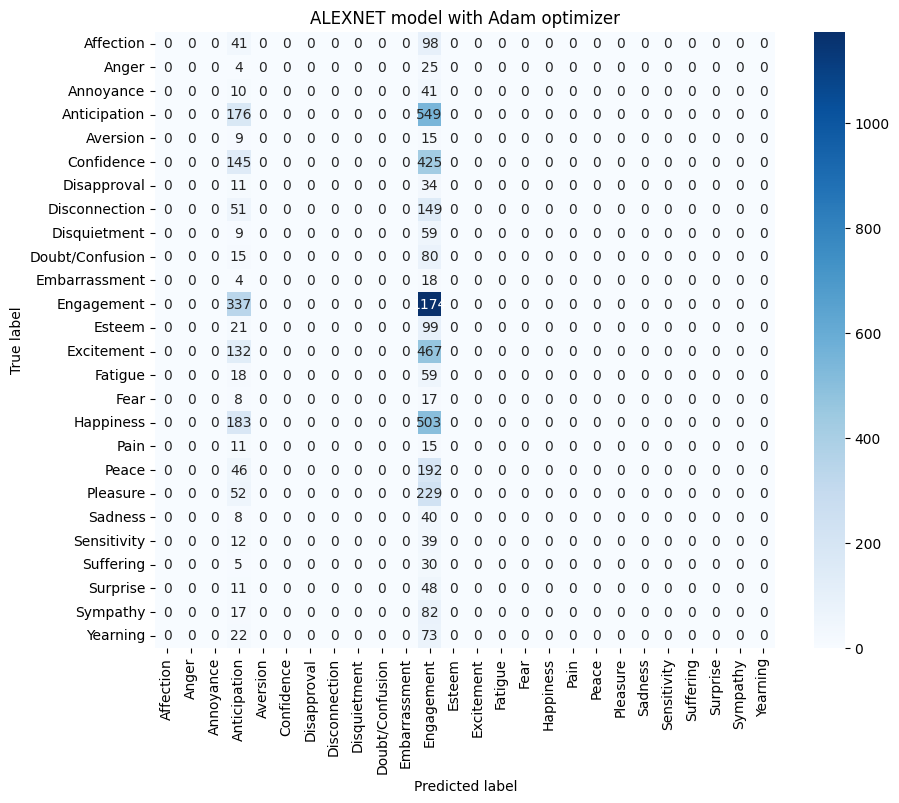

ALEXNET with Adam Optimiser All Score:
Accuracy:  [0.17398391664028168, 0.18137361109256744, 0.1884372979402542, 0.19680504500865936, 0.19079186022281647, 0.19383467733860016, 0.19347243010997772, 0.19836267828941345, 0.19713105261325836, 0.20173150300979614]
Loss:  [296.89495849609375, 224.80010986328125, 222.39675903320312, 217.68328857421875, 214.61239624023438, 212.23216247558594, 209.5388641357422, 208.43360900878906, 207.68560791015625, 204.77320861816406]
Val_Accuracy:  [0.16785714030265808, 0.11785714328289032, 0.23877550661563873, 0.15595237910747528, 0.18333333730697632, 0.1894557774066925, 0.194387748837471, 0.2124149650335312, 0.20765306055545807, 0.2360544204711914]
Val_Loss:  [2.9269747734069824, 3.0191166400909424, 2.9141159057617188, 3.163543939590454, 3.1168453693389893, 2.9976277351379395, 3.0496912002563477, 3.0104551315307617, 3.0137619972229004, 3.0612969398498535]

ALEXNET with Adam Optimiser Best Score:
Accuracy:  0.20173150300979614
Loss:  204.77320861816406
Val

In [14]:
# Load the pre-trained model
model_name = "ALEXNET"
optimiser = "Adam"
model = load_pretrained_model(model_name)

# Train the model on the EMOTIC dataset
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    class_weight=class_weightss,
    epochs=25
)

accuracy = model.history.history['accuracy']
loss = model.history.history['loss']
val_accuracy = model.history.history['val_accuracy']
val_loss = model.history.history['val_loss']


# plot confusion matrix for model and optimizer
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis=-1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title(f'{model_name} model with {optimiser} optimizer')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig(f'{model_name}_{optimiser}_confusion_matrix.png')
plt.show()

#results
print(f"{model_name} with {optimiser} Optimiser All Score:")
print("Accuracy: ",accuracy)
print("Loss: ",loss)
print("Val_Accuracy: ",val_accuracy)
print("Val_Loss: ",val_loss)
print("")
print(f"{model_name} with {optimiser} Optimiser Best Score:")
print("Accuracy: ",max(accuracy))
print("Loss: ",min(loss))
print("Val_Accuracy: ",max(val_accuracy))
print("Val_Loss: ",min(val_loss))

model_results[optimiser] = {'Accuracy': max(accuracy), 'Loss': min(loss),'Val Accuracy': max(val_accuracy),'Val Loss': min(val_loss)}

# store model results in dictionary
results[model_name] = model_results

# Evaluation Metrics

In [15]:
# Compute classification report
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis=-1)
classification_rep = classification_report(y_true, y_pred, target_names=class_names)

# Print classification report
print("Classification Report:")
print(classification_rep)

106/106 [==============================] - 29s 272ms/step
Classification Report:
                 precision    recall  f1-score   support

      Affection       0.00      0.00      0.00       139
          Anger       0.00      0.00      0.00        29
      Annoyance       0.00      0.00      0.00        51
   Anticipation       0.12      0.23      0.16       725
       Aversion       0.00      0.00      0.00        24
     Confidence       0.00      0.00      0.00       570
    Disapproval       0.00      0.00      0.00        45
  Disconnection       0.00      0.00      0.00       200
   Disquietment       0.00      0.00      0.00        68
Doubt/Confusion       0.00      0.00      0.00        95
  Embarrassment       0.00      0.00      0.00        22
     Engagement       0.26      0.78      0.39      1511
         Esteem       0.00      0.00      0.00       120
     Excitement       0.00      0.00      0.00       599
        Fatigue       0.00      0.00      0.00        77
      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(f"{model_name} with {optimiser} Optimiser All Score:")
print("Accuracy: ",accuracy)
print("Loss: ",loss)
print("Val_Accuracy: ",val_accuracy)
print("Val_Loss: ",val_loss)
print("")
print(f"{model_name} with {optimiser} Optimiser Best Score:")
print("Accuracy: ",max(accuracy))
print("Loss: ",min(loss))
print("Val_Accuracy: ",max(val_accuracy))
print("Val_Loss: ",min(val_loss))

model_results[optimiser] = {'Accuracy': max(accuracy), 'Loss': min(loss),'Val Accuracy': max(val_accuracy),'Val Loss': min(val_loss)}

# store model results in dictionary
results[model_name] = model_results

ALEXNET with Adam Optimiser All Score:
Accuracy:  [0.17398391664028168, 0.18137361109256744, 0.1884372979402542, 0.19680504500865936, 0.19079186022281647, 0.19383467733860016, 0.19347243010997772, 0.19836267828941345, 0.19713105261325836, 0.20173150300979614]
Loss:  [296.89495849609375, 224.80010986328125, 222.39675903320312, 217.68328857421875, 214.61239624023438, 212.23216247558594, 209.5388641357422, 208.43360900878906, 207.68560791015625, 204.77320861816406]
Val_Accuracy:  [0.16785714030265808, 0.11785714328289032, 0.23877550661563873, 0.15595237910747528, 0.18333333730697632, 0.1894557774066925, 0.194387748837471, 0.2124149650335312, 0.20765306055545807, 0.2360544204711914]
Val_Loss:  [2.9269747734069824, 3.0191166400909424, 2.9141159057617188, 3.163543939590454, 3.1168453693389893, 2.9976277351379395, 3.0496912002563477, 3.0104551315307617, 3.0137619972229004, 3.0612969398498535]

ALEXNET with Adam Optimiser Best Score:
Accuracy:  0.20173150300979614
Loss:  204.77320861816406
Val

In [17]:
results

{'ALEXNET': {'Adam': {'Accuracy': 0.20173150300979614,
   'Loss': 204.77320861816406,
   'Val Accuracy': 0.23877550661563873,
   'Val Loss': 2.9141159057617188}}}

## Saving Model and Weights

In [18]:
model.save('ALEXNET_Emotic_Adam')

In [19]:
model.save_weights('ALEXNET_Emotic_Adam_Weights.h5')
model.save('ALEXNET_Emotic_Adam.h5')

## Co-Occurence Matrix

In [20]:
# Load the EmoTIC dataset
data_dir = '/kaggle/working/test'
emotions = os.listdir(data_dir)
num_emotions = len(emotions)

In [21]:
emotions

['Doubt',
 'Sensitivity',
 'Pain',
 'Surprise',
 'Anticipation',
 'Aversion',
 'Happiness',
 'Suffering',
 'Annoyance',
 'Esteem',
 'Sympathy',
 'Anger',
 'Embarrassment',
 'Fear',
 'Fatigue',
 'Confidence',
 'Affection',
 'Disapproval',
 'Sadness',
 'Disquietment',
 'Engagement',
 'Disconnection',
 'Excitement',
 'Pleasure',
 'Yearning',
 'Peace']

In [22]:
num_emotions

26

In [23]:
# Create a dictionary to map emotion labels to indices
emotion_to_idx = {emotion: idx for idx, emotion in enumerate(emotions)}

# Create a co-occurrence matrix
cooc_matrix = np.zeros((num_emotions, num_emotions), dtype=int)


In [24]:
from PIL import Image
for emotion in emotions:
    # Get the list of images for this emotion
    image_dir = os.path.join(data_dir, emotion)
    image_files = os.listdir(image_dir)
    
    for image_file in image_files:
        # Load and preprocess the image
        img_path = os.path.join(image_dir, image_file)
        img = Image.open(img_path)
        img = img.resize((224, 224))
        x = np.array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        # Make a prediction using the AlexNet model
        preds = model.predict(x)
        pred_emotions = emotions[np.argmax(preds)]
        
        # Increment the co-occurrence matrix
        row_idx = emotion_to_idx[emotion]
        col_idx = emotion_to_idx[pred_emotions]
        cooc_matrix[row_idx, col_idx] += 1

1/1 [==============================] - 0s 26ms/step


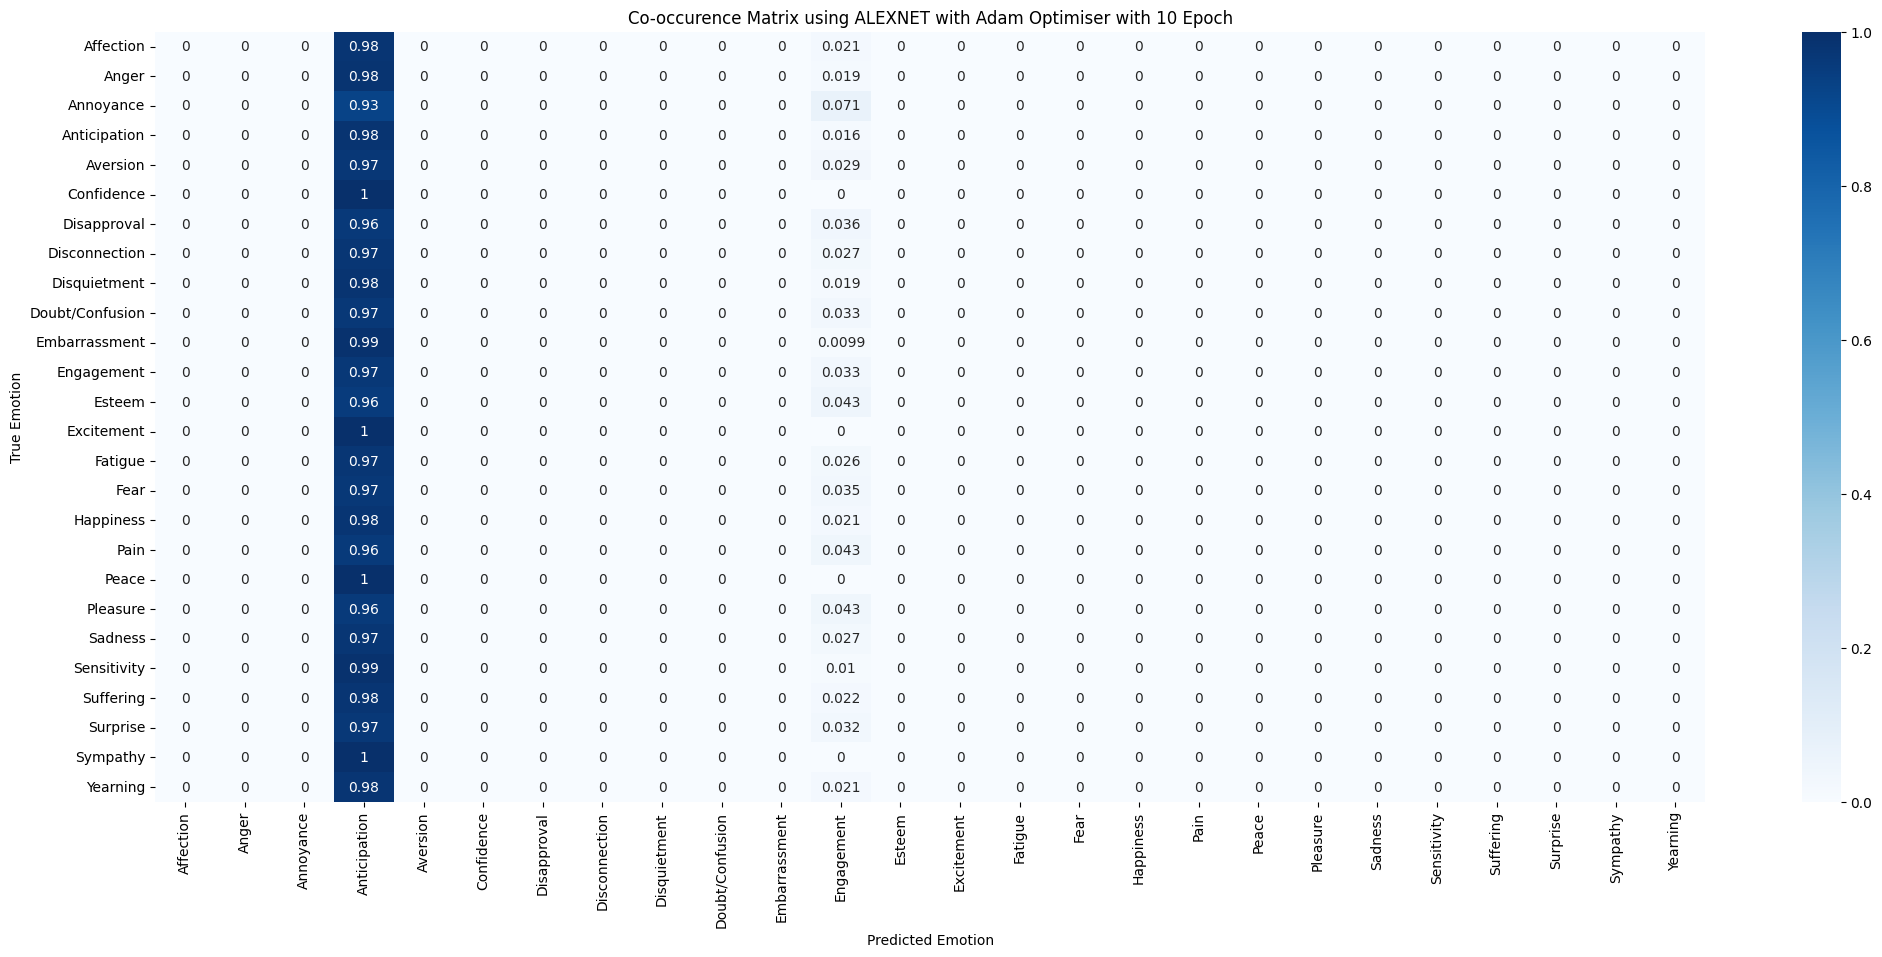

In [25]:
# Normalize the co-occurrence matrix
cooc_matrix = cooc_matrix / cooc_matrix.sum(axis=1)[:, np.newaxis]

# Create a pandas DataFrame from the co-occurrence matrix
cooc_df = pd.DataFrame(cooc_matrix, index=class_names, columns=class_names)

# Plot the co-occurrence matrix as a heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(cooc_df, annot=True, cmap='Blues')
plt.title('Co-occurence Matrix using ALEXNET with Adam Optimiser with 25 Epoch')
plt.xlabel('Predicted Emotion')
plt.ylabel('True Emotion')
plt.savefig('Co-occurence Matrix using ALEXNET with Adam Optimiser with 25 Epoch.png')
plt.show()

## Image Prediction

In [26]:
emotion_labels = ['Affection', 'Anger', 'Annoyance', 'Anticipation', 'Aversion', 'Confidence', 'Disapproval', 'Disconnection',
            'Disquietment', 'Doubt', 'Embarrassment', 'Engagement', 'Esteem', 'Excitement', 'Fatigue',
            'Fear', 'Happiness','Pain', 'Peace', 'Pleasure', 'Sadness', 'Sensitivity', 'Suffering', 'Surprise',
            'Sympathy', 'Yearning']

In [27]:
def predict_emotion(image_path):
    # Load the image and preprocess it
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.resnet.preprocess_input(img)

    # Make a prediction using the loaded model
    pred = model.predict(img)

    # Get the predicted emotion label and confidence score
    emotion_index = np.argmax(pred)
    emotion_label = emotion_labels[emotion_index]
    confidence_score = pred[0][emotion_index]
    Pred = pred[0]

    return emotion_label, confidence_score, Pred

1/1 [==============================] - 0s 27ms/step


/tmp/ipykernel_23/3970480430.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(emotion_labels, rotation=90)


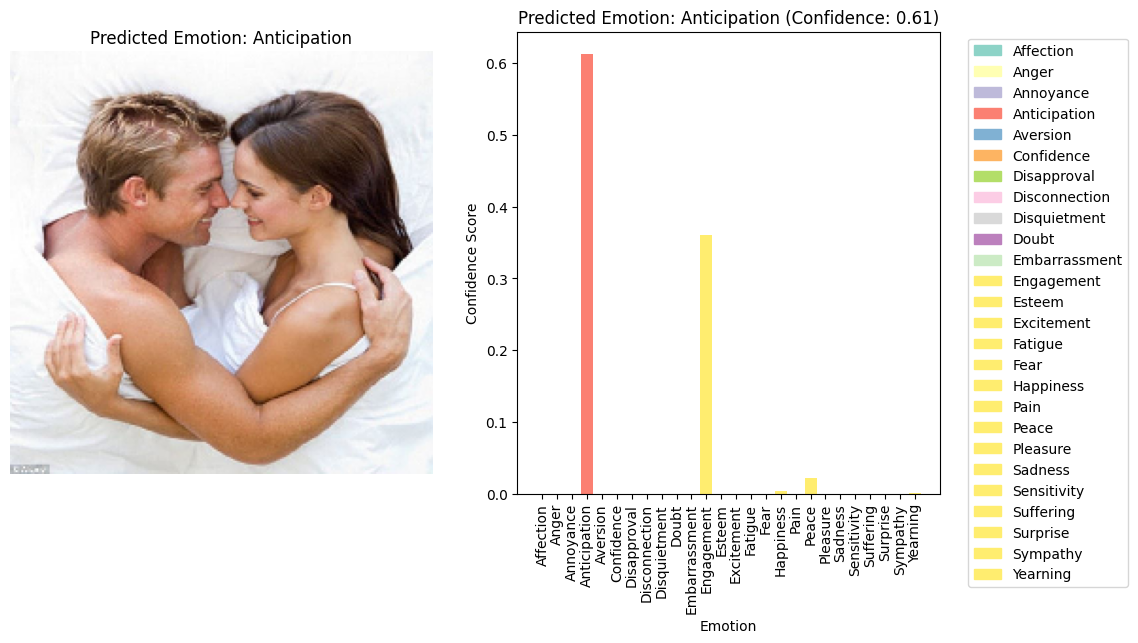

In [28]:
# Define a color map for the emotions
cmap = plt.get_cmap('Set3')

# Define the image file path
image_path = '/kaggle/input/emotion/e/Affection.jpg'

# Predict the emotion label of the image
emotion_label, confidence_score, pred = predict_emotion(image_path)

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar graph with the predicted emotions and their corresponding confidence scores
bars = ax2.bar(emotion_labels, pred, color=cmap(range(len(emotion_labels))))
ax2.set_xticklabels(emotion_labels, rotation=90)
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Confidence Score')
ax2.set_title(f'Predicted Emotion: {emotion_label} (Confidence: {confidence_score:.2f})')

# Add a legend to the bar graph
handles = [mpatches.Patch(color=cmap(i), label=emotion_labels[i]) for i in range(len(emotion_labels))]
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the image with the predicted emotion label
img = load_img(image_path, target_size=(224, 224))
ax1.imshow(img)
ax1.axis('off')
ax1.set_title(f'Predicted Emotion: {emotion_label}')
plt.savefig(f'{model_name}_{optimiser}_1_output.png')
plt.show()

1/1 [==============================] - 0s 26ms/step


/tmp/ipykernel_23/3600655490.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(emotion_labels, rotation=90)


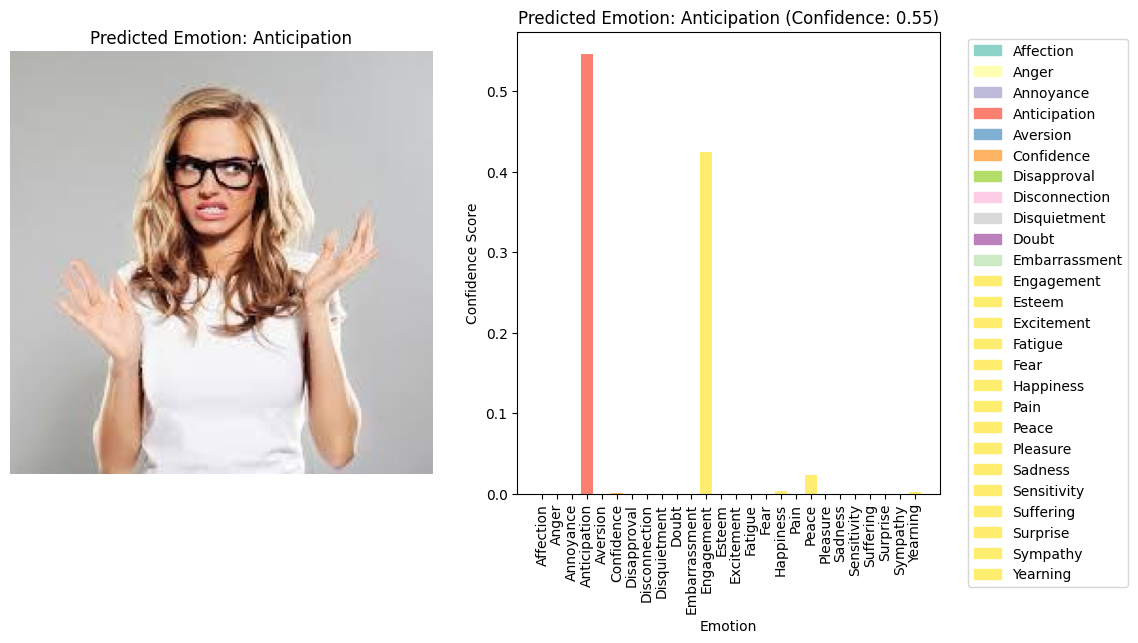

In [29]:
# Define a color map for the emotions
cmap = plt.get_cmap('Set3')

# Define the image file path
image_path = '/kaggle/input/emotion/e/Anger.jpg'

# Predict the emotion label of the image
emotion_label, confidence_score, pred = predict_emotion(image_path)

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar graph with the predicted emotions and their corresponding confidence scores
bars = ax2.bar(emotion_labels, pred, color=cmap(range(len(emotion_labels))))
ax2.set_xticklabels(emotion_labels, rotation=90)
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Confidence Score')
ax2.set_title(f'Predicted Emotion: {emotion_label} (Confidence: {confidence_score:.2f})')

# Add a legend to the bar graph
handles = [mpatches.Patch(color=cmap(i), label=emotion_labels[i]) for i in range(len(emotion_labels))]
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the image with the predicted emotion label
img = load_img(image_path, target_size=(224, 224))
ax1.imshow(img)
ax1.axis('off')
ax1.set_title(f'Predicted Emotion: {emotion_label}')
plt.savefig(f'{model_name}_{optimiser}_2_output.png')
plt.show()

1/1 [==============================] - 0s 26ms/step


/tmp/ipykernel_23/583692109.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(emotion_labels, rotation=90)


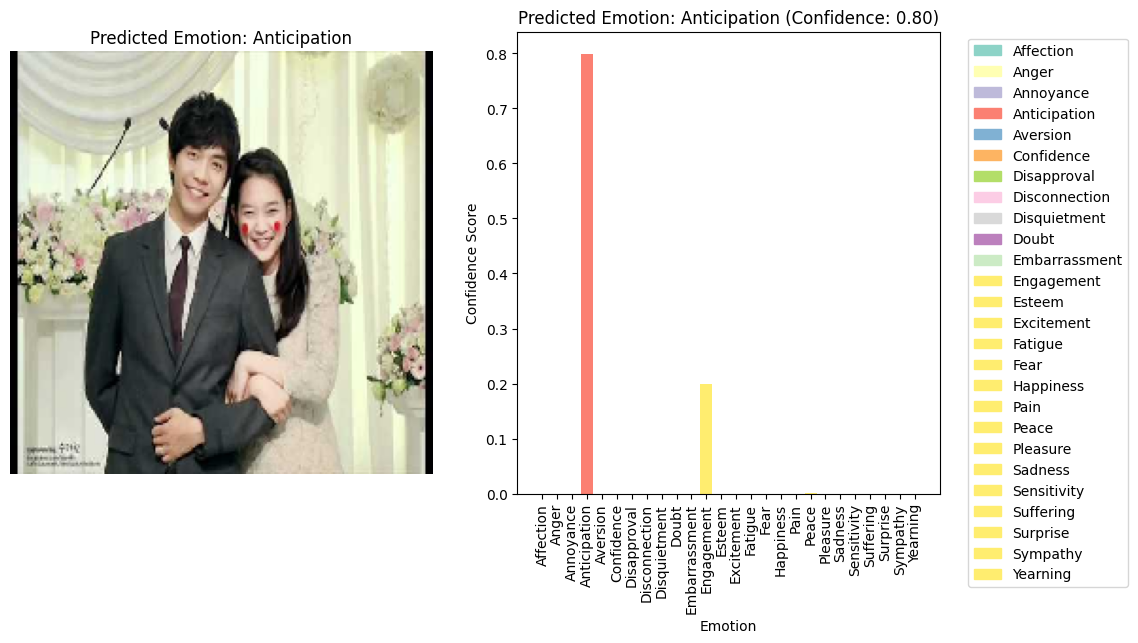

In [30]:
# Define a color map for the emotions
cmap = plt.get_cmap('Set3')

# Define the image file path
image_path = '/kaggle/input/emotion/e/Aniticipation.jpg'

# Predict the emotion label of the image
emotion_label, confidence_score, pred = predict_emotion(image_path)

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar graph with the predicted emotions and their corresponding confidence scores
bars = ax2.bar(emotion_labels, pred, color=cmap(range(len(emotion_labels))))
ax2.set_xticklabels(emotion_labels, rotation=90)
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Confidence Score')
ax2.set_title(f'Predicted Emotion: {emotion_label} (Confidence: {confidence_score:.2f})')

# Add a legend to the bar graph
handles = [mpatches.Patch(color=cmap(i), label=emotion_labels[i]) for i in range(len(emotion_labels))]
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the image with the predicted emotion label
img = load_img(image_path, target_size=(224, 224))
ax1.imshow(img)
ax1.axis('off')
ax1.set_title(f'Predicted Emotion: {emotion_label}')
plt.savefig(f'{model_name}_{optimiser}_3_output.png')
plt.show()

1/1 [==============================] - 0s 26ms/step


/tmp/ipykernel_23/2876160644.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(emotion_labels, rotation=90)


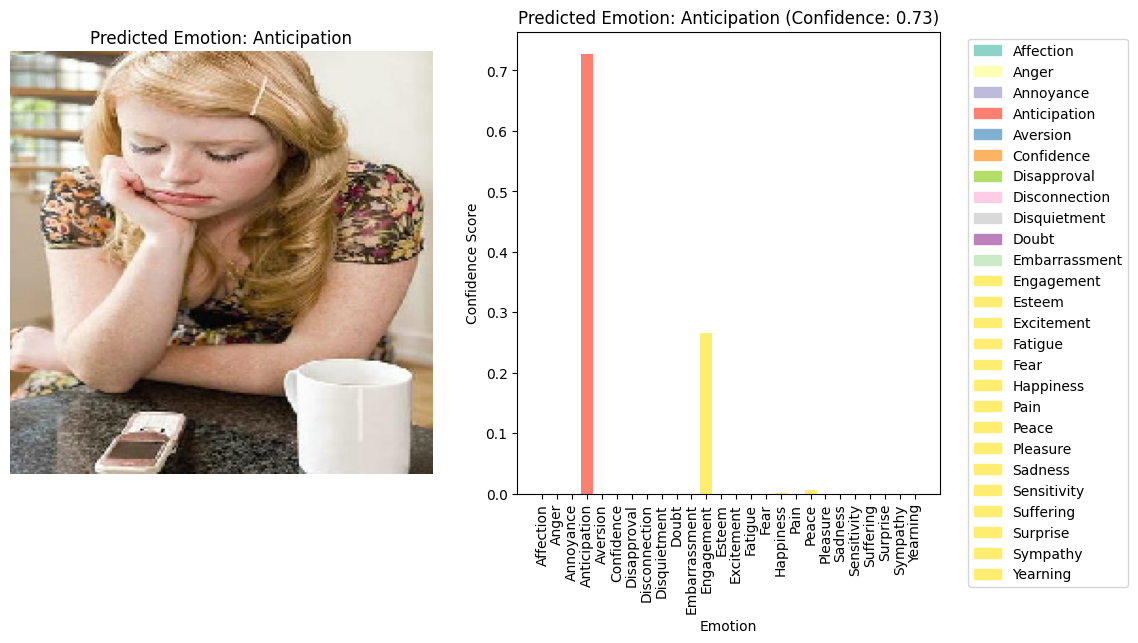

In [31]:
# Define a color map for the emotions
cmap = plt.get_cmap('Set3')

# Define the image file path
image_path = '/kaggle/input/emotion/e/Annoyance.jpg'

# Predict the emotion label of the image
emotion_label, confidence_score, pred = predict_emotion(image_path)

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar graph with the predicted emotions and their corresponding confidence scores
bars = ax2.bar(emotion_labels, pred, color=cmap(range(len(emotion_labels))))
ax2.set_xticklabels(emotion_labels, rotation=90)
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Confidence Score')
ax2.set_title(f'Predicted Emotion: {emotion_label} (Confidence: {confidence_score:.2f})')

# Add a legend to the bar graph
handles = [mpatches.Patch(color=cmap(i), label=emotion_labels[i]) for i in range(len(emotion_labels))]
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the image with the predicted emotion label
img = load_img(image_path, target_size=(224, 224))
ax1.imshow(img)
ax1.axis('off')
ax1.set_title(f'Predicted Emotion: {emotion_label}')
plt.savefig(f'{model_name}_{optimiser}_4_output.png')
plt.show()

1/1 [==============================] - 0s 27ms/step


/tmp/ipykernel_23/3360884206.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(emotion_labels, rotation=90)


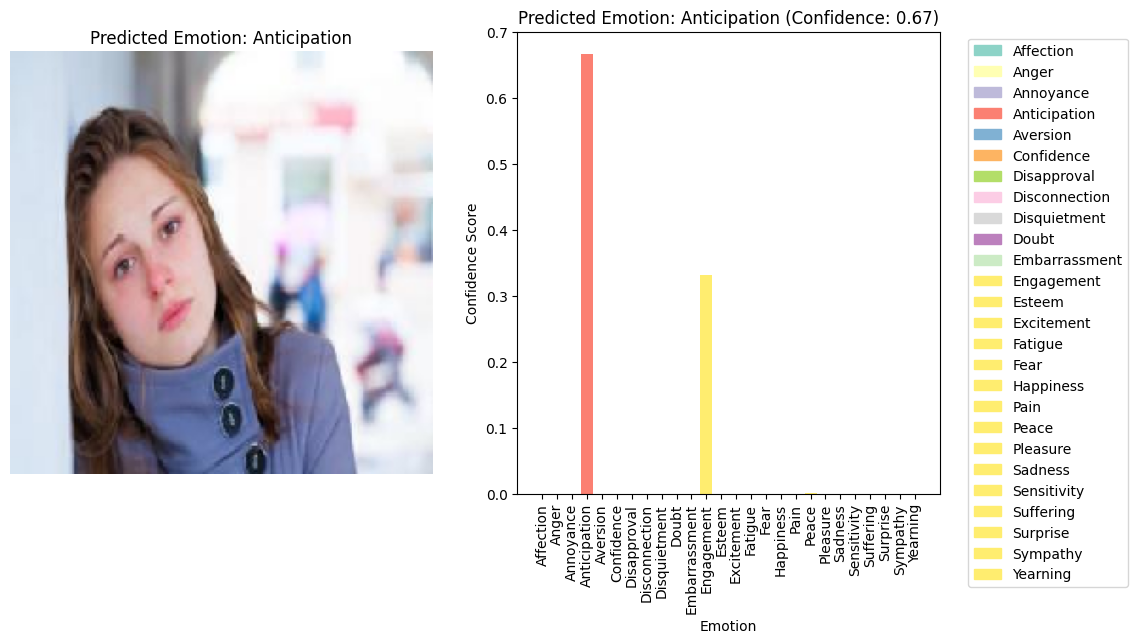

In [32]:
# Define a color map for the emotions
cmap = plt.get_cmap('Set3')

# Define the image file path
image_path = '/kaggle/input/emotion/e/sadness.jpg'

# Predict the emotion label of the image
emotion_label, confidence_score, pred = predict_emotion(image_path)

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar graph with the predicted emotions and their corresponding confidence scores
bars = ax2.bar(emotion_labels, pred, color=cmap(range(len(emotion_labels))))
ax2.set_xticklabels(emotion_labels, rotation=90)
ax2.set_xlabel('Emotion')
ax2.set_ylabel('Confidence Score')
ax2.set_title(f'Predicted Emotion: {emotion_label} (Confidence: {confidence_score:.2f})')

# Add a legend to the bar graph
handles = [mpatches.Patch(color=cmap(i), label=emotion_labels[i]) for i in range(len(emotion_labels))]
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the image with the predicted emotion label
img = load_img(image_path, target_size=(224, 224))
ax1.imshow(img)
ax1.axis('off')
ax1.set_title(f'Predicted Emotion: {emotion_label}')
plt.savefig(f'{model_name}_{optimiser}_5_output.png')
plt.show()